#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 5

# Machine Learning

#### k-Nearest Neighbors 



## Exercice 1.  k-Nearest Neighbors (from scratch)

Dans ce premier exercice, nous allons coder un algorithme de classification : le $k$-nn.

On commence par importer les modules python :

- numpy : pour des calculs (algèbre linéaire, etc)
- pandas : pour la lecture des fichiers csv, etc 

In [15]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

#### Etape 1 : Distance euclidienne

1. Ecrire une fonction pour calculer la distance euclidienne entre deux points (représentés par des np.array). Attention, le tableau donné comme deuxième paramètre de la fonction contient, en dernière position, la classe de l'élément qu'il représente. Cette information n'est pas utilisée pour le calcul de distance.

In [16]:
### CORRECTION
def euclidean(u, v):
    return np.sqrt(np.sum((u - v[:-1])**2))

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [17]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 1])
w = np.array([2, 3, 4, 0])
print(euclidean(u, v)) # 0.0
print(euclidean(u, w)) # 1.7320508075688772

0.0
1.7320508075688772


2. Ecrire une fonction pour calculer les distances d'un point à tous les autres points d'un dataset (matrice numpy - voir exemple)

In [18]:
### CORRECTION
def distances(u, dataset):
    dist = []
    for d in dataset:
        dist.append(euclidean(u, d))
    return dist

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [19]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])
dist = distances(u, dataset)
print(dist) # [0.0, 5.196152422706632, 1.7320508075688772, 3.4641016151377544]

[0.0, 5.196152422706632, 1.7320508075688772, 3.4641016151377544]


#### Etape 2 : Récupérer la liste des $k$ voisins les plus proches

1. Ecrire une fonction <code>voisins</code> permettant de récupérer dans un dataset la liste des $k$-voisins les plus proches d'un point donné.

In [20]:
### CORRECTION

# def voisins(u, dataset, k):
#     distances = []
#     for d in dataset:
#         distances.append((d, euclidean(u, d)))
#     distances.sort(key=lambda tup: tup[1])
#     neighs = [distances[i][0] for i in range(k)]
#     return neighs

def voisins(u, dataset, k):
    sorted_indices = np.argsort(distances(u, dataset))
    return dataset[sorted_indices < k]


Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [21]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])

print(voisins(u, dataset, 2)) # [array([1, 2, 3, 0]), array([2, 3, 4, 1])]

[[1 2 3 0]
 [3 4 5 1]]


#### Etape 3 : Faire des prédictions

1. Ecrire une fonction <code>classifier()</code> retournant la classe d'un élément $u$.

In [22]:
### CORRECTION
def classifier(u, dataset, k):
    v = voisins(u, dataset, k)
    classes = {0:0, 1:0}
    for e in v:
        classes[e[-1]] += 1
    if classes[0] > classes[1]:
        return 0
    return 1

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [23]:
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])

print(classifier(u, dataset, 3)) # 1

1


### Exercice 2. Application

Dans cet exercice, nous allons appliquer l'algorithme écrit ci-dessus pour classifier des iris.
Pour cela, nous commençons par charger le dataset : 

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Comme indiqué dans sa description, le dataset contient, pour chaque iris, la longueur et la largeur de sa sépale et la longueur et la largeur de sa pétale. Les iris sont ensuite classifiés soit en Iris-Setosa (0), soit en Iris-Versicolour (1) ou encore en Iris-Virginica (2) :
                

<b>Indication :</b> le dataset <code>iris</code> est composé de deux parties : 
 - <code>iris.data</code> décrit les caractéristiques (features)
 - <code>iris.target</code> contient les classes

In [25]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
print(iris.data.shape)

(150, 4)


In [27]:
print(iris.target.shape)

(150,)


Pour des raisons pédagogiques, et pour se focaliser sur l'algorithme, nous avons choisi de l'implémenter pour faire de la classification binaire (c'est ce que réalisent les étapes de l'exercice 1). 

1. Ecrire l'instruction permettant de transformer le problème en un problème de classification binaire :  tous les Iris-Virginica (2) seront classés en Iris-Versicolour (1).

In [28]:
### CORRECTION
iris.target[iris.target == 2] = 1

In [29]:
### CORRECTION
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


2. Afin d'utiliser l'algorithme que vous avez implémenté dans l'exercice 1, créer un tableau <code>dataset</code> dont le contenu sera des iris avec leur classes. Pour pouvoir visualiser le dataset, nous n'allons garder que les deux premières colonnes.

In [30]:
### CORRECTION
dataset = np.concatenate((iris.data[:, 0:2], iris.target[:, None]), axis=1)
print(np.shape(dataset))

(150, 3)


3. Visualiser le dataset

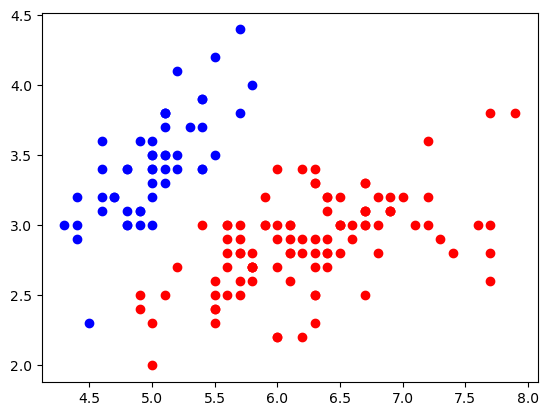

In [31]:
### CORRECTION
import matplotlib.pyplot as plt
%matplotlib inline
colors = {0: 'blue', 1: 'red'}
for i in range(len(iris.data)):
    plt.scatter(iris.data[i][0:1], iris.data[i][1:2], color=colors[iris.target[i]])

4. Soit le vecteur $u(6.5, 2.5)$, utilisez votre algorithme avec $k=3$ pour classer $u$.

In [32]:
### CORRECTION
u = np.array([6.5, 2.5])
classifier(u, dataset, k=3)

1

5. Afficher le nouveau point sur le graphique et vérifier visuellement votre résultat.

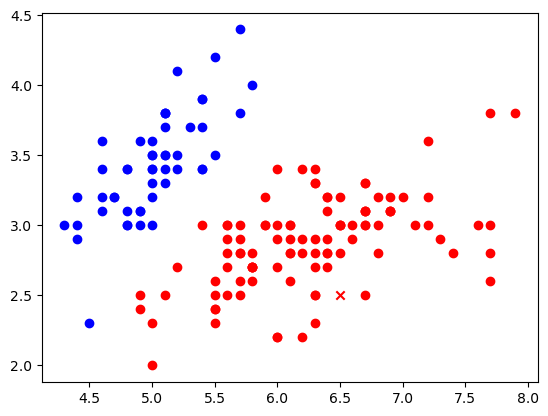

In [33]:
### CORRECTION
u = np.array([6.5, 2.5])

colors = {0: 'blue', 1: 'red'}
for i in range(len(iris.data)):
    plt.scatter(iris.data[i][0:1], iris.data[i][1:2], color=colors[iris.target[i]])

plt.scatter(u[0],u[1], color=colors[classifier(u, dataset, k=3)], marker='x')

### Exercice 3 : $k$-nn avec <code>sklearn</code>

Dans cet exercice, nous allons utiliser le classifieur $k$−nn pour apprendre à reconnaître des fruits. Pour cela, nous allons utiliser le dataset fruits disponible au format csv à l’adresse :
               
               https://www.labri.fr/~zemmari/datasets/fruits.csv

1. Charger les données, puis afficher les informations pour vérifier si le dataset ne contient pas de données manquantes.

In [34]:
### CORRECTION
import pandas as pa
fruits = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/fruits.csv', delimiter='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [35]:
### CORRECTION
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


2. Afficher un graphique pour visualiser les tailles (height) en fonction des largeurs (width), sans tenir compte des classes des points dans un premier temps.

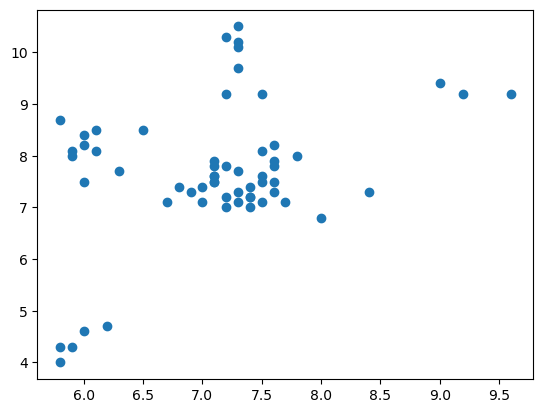

In [36]:
### CORRECTION
import matplotlib.pyplot as plt
plt.scatter(fruits['width'], fruits['height'])

3. Modifier votre graphique pour qu’il affiche les points avec des couleurs différentes en fonction du
nom (<code>fruit_name</code>) du fruit. Vérifier que les classes sont assez équilibrées.

In [37]:
### CORRECTION
print(fruits.fruit_name.unique())

['apple' 'mandarin' 'orange' 'lemon']


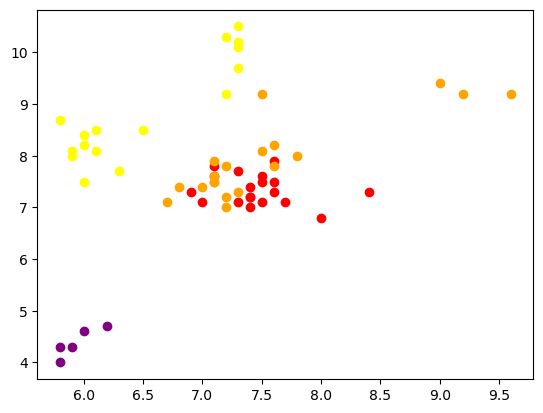

In [38]:
### CORRECTION
colors = {'apple': 'red',
          'mandarin':'purple',
          'orange': 'orange', 
          'lemon': 'yellow'}
for i in range(len(fruits['width'])):
    plt.scatter(fruits['width'][i], fruits['height'][i], c=colors[fruits['fruit_name'][i]])

In [39]:
### CORRECTION
print(fruits.fruit_name.value_counts())

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


4. Définir X les données composées de la taille, la longueur et la masse des fruits, et Y les noms des
fruits.

In [40]:
### CORRECTION
X = fruits[['mass', 'width', 'height']]
Y = fruits['fruit_name']

5. Découper les données en deux parties : une pour l’entraînement et une pour le test.

In [41]:
### CORRECTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
print(X_train.describe())

             mass      width     height
count   44.000000  44.000000  44.000000
mean   159.090909   7.038636   7.643182
std     53.316876   0.835886   1.370350
min     76.000000   5.800000   4.000000
25%    127.500000   6.175000   7.200000
50%    157.000000   7.200000   7.600000
75%    172.500000   7.500000   8.250000
max    356.000000   9.200000  10.500000


6. Entraîner un classifieur $k$−nn à reconnaître les fruits. 

In [42]:
### CORRECTION
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

7. Quelle est la valeur par défaut de $k$ ?

In [43]:
### CORRECTION
print(f"Number of neighbors taken into account : {KNeighborsClassifier().n_neighbors}")

Number of neighbors taken into account : 5


8. Utiliser votre jeu de test pour mesurer les performances de votre classifieur (matrice de confusion, accuracy, ...). 

In [44]:
### CORRECTION
y_pred = knn.predict(X_test)
#print(y_pred)

In [45]:
### CORRECTION
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [3 3 0 2]]


In [46]:
### CORRECTION
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:2.2%}'.format(acc))

Accuracy: 53.33%


7. Quelle est la nature du fruit dont la masse, la largeur et la taille sont données respectivement par 100, 6.3 et 8? 

In [47]:
### CORRECTION
print(knn.predict([[100, 6.3, 8]]))

['lemon']


8. Trouver une "bonne" valeur pour k.

In [48]:
### CORRECTION
def best_model_search(X_train, X_test, y_train, y_test, n=10, patience=3):
    k = 1
    best_acc = 0
    best_model = None
    p = patience
    while k <n and p >0 :
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('k: ',k, '{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc = acc
            best_model = knn
            p = patience + 1
        p = p -1
        k = k+1
    return best_model,k, best_acc

In [49]:
### CORRECTION
knn, k, acc = best_model_search(X_train, X_test, y_train, y_test, patience=3, n = 100)

k:  1 60.00%
k:  2 46.67%
k:  3 53.33%
k:  4 60.00%


In [50]:
### CORRECTION
print(k, '{:.2%}'.format(acc))

5 60.00%


In [51]:
### CORRECTION
knn, k, acc = best_model_search(X_train, X_test, y_train, y_test, patience=10, n = 100)

k:  1 60.00%
k:  2 46.67%
k:  3 53.33%
k:  4 60.00%
k:  5 53.33%
k:  6 53.33%
k:  7 53.33%
k:  8 26.67%
k:  9 53.33%
k:  10 33.33%
k:  11 26.67%


In [52]:
### CORRECTION
print(k, '{:.2%}'.format(acc))

12 60.00%
